<a href="https://colab.research.google.com/github/Tiru-Kaggundi/Trade_Stuff/blob/main/CBAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [5]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Read in the data from the Excel sheet
file_path = '/content/drive/MyDrive/CBAM/CBAM_DATA_V3.xlsx'
file_path_owid = "/content/drive/MyDrive/CBAM/owid_co2_data.xlsx"
data = pd.read_excel(file_path, sheet_name='data')
df_owid = pd.read_excel(file_path_owid)

In [7]:
data.head()

,Country,per_capita_emissions_2019,cumulative_emissions_2020,GDP,GDP_PC
0,Afghanistan,0.293401,4.080106e+09,18904490263,501
1,Albania,1.721533,9.581900e+09,15401830754,5396
2,Algeria,4.203331,1.011169e+11,15401830754,4022
3,Andorra,6.285722,2.514956e+08,3155065488,41328
4,Angola,0.674362,1.179320e+10,69309110146,2142


In [8]:
df_owid.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:

# Create a subset of the data that only includes the columns we want to plot
subset = data[['Country', 'per_capita_emissions_2019', 'cumulative_emissions_2020', 'GDP']]

# Define a function to calculate the size of the bubbles based on GDP
def calc_bubble_size(gdp):
    return np.log(gdp / np.pi)

# Create a new column in the subset that contains the bubble sizes
subset['Bubble Size'] = calc_bubble_size(subset['GDP'])

# Define the x-axis and y-axis variables
x = subset['per_capita_emissions_2019']
y = subset['cumulative_emissions_2020']


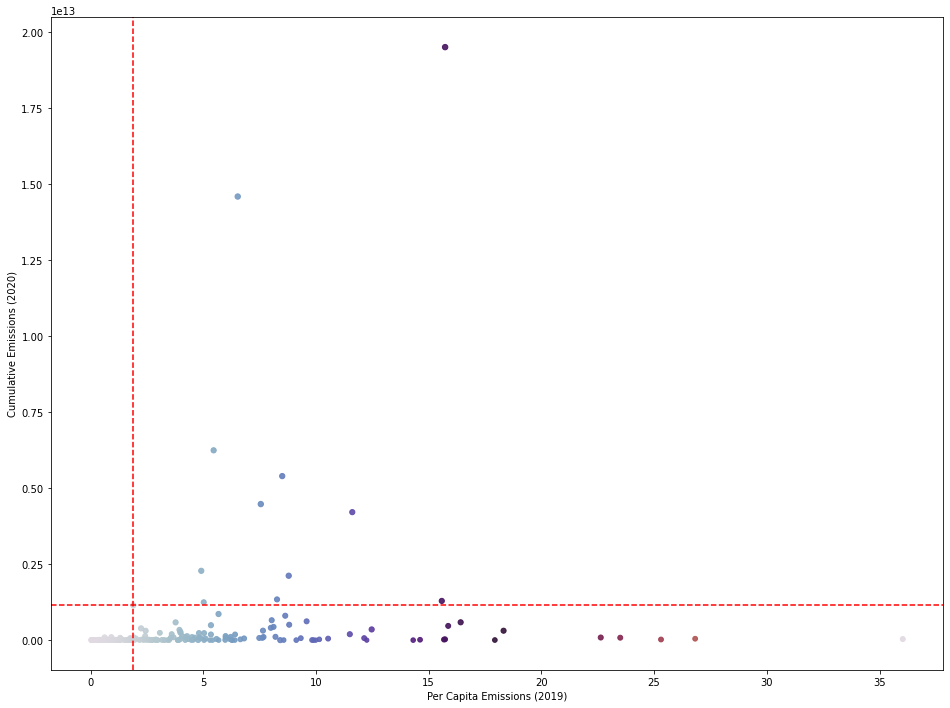

In [10]:

# Create the bubble plot
fig, ax = plt.subplots(figsize=(16, 12))
ax.scatter(x, y, s=subset['Bubble Size'], c=subset['per_capita_emissions_2019'], cmap='twilight', alpha=0.9)

# Add the horizontal line for India's cumulative emissions
india_cumulative_emissions = subset[subset['Country'] == 'India']['cumulative_emissions_2020'].values[0]
ax.axhline(india_cumulative_emissions, color='red', linestyle='--')

# Add the vertical line for India's per capita emissions
india_per_capita_emissions = subset[subset['Country'] == 'India']['per_capita_emissions_2019'].values[0]
ax.axvline(india_per_capita_emissions, color='red', linestyle='--')

# Set the x-axis and y-axis labels
ax.set_xlabel('Per Capita Emissions (2019)')
ax.set_ylabel('Cumulative Emissions (2020)')

# Show the plot
plt.show()

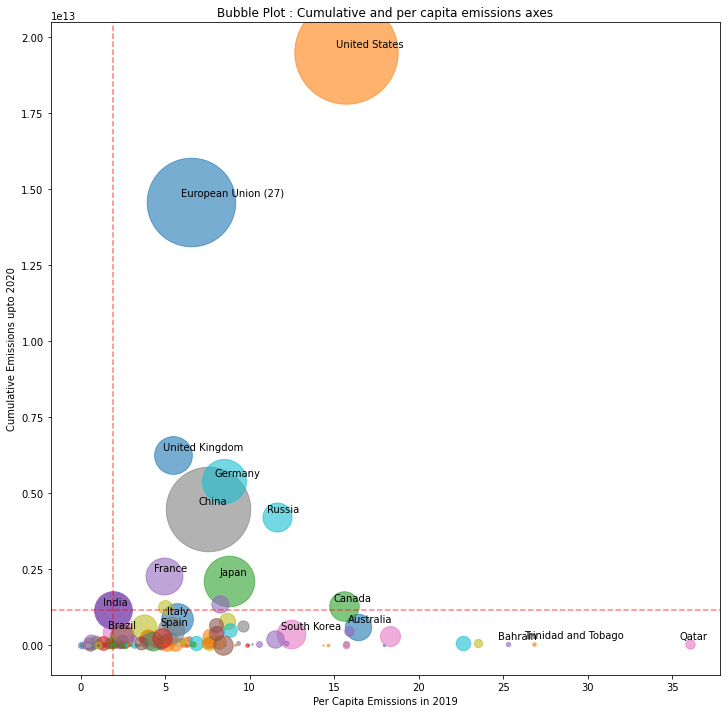

In [11]:
# Set up plot
fig, ax = plt.subplots(figsize=(12, 12))
fig.set_facecolor('white')

# Extract data for India
india = data[data['Country'] == 'India']
india_x = india['per_capita_emissions_2019'].iloc[0]
india_y = india['cumulative_emissions_2020'].iloc[0]

# Set up colors for each country
#colors = {'India': 'red', 'China': 'blue', 'United States': 'green', 'Russia': 'purple', 'Japan': 'orange'}

# Sort data by GDP in descending order and extract top 15 rows
top_15 = data.sort_values('GDP', ascending=False).head(15)

# Sort data by per capita emissions in descending order and extract top 3 rows
top_3_emittors = data.sort_values('per_capita_emissions_2019', ascending=False).head(3)

# Set up scaling factor for bubble size
scale_factor = 2000000000

# Plot bubbles for each country
for country in data['Country'].unique():
    subset = data[data['Country'] == country]
    x = subset['per_capita_emissions_2019']
    y = subset['cumulative_emissions_2020']
    size = subset['GDP'] / scale_factor
    alpha = 0.6
    if country == 'India':
        alpha = 1.0
    ax.scatter(x, y, s=size, alpha=alpha)

# Add horizontal and vertical lines for India
ax.axhline(y=india_y, linestyle='--', color='red', alpha=0.5)
ax.axvline(x=india_x, linestyle='--', color='red', alpha=0.5)


# Add text labels for top 20 countries by GDP
for i, row in top_15.iterrows():
    x = row['per_capita_emissions_2019']
    y = row['cumulative_emissions_2020']
    label = row['Country']
    ax.annotate(label, xy=(x, y), xytext=(-10, 5), textcoords='offset points', fontsize=10)

# Add text labels for top 3 countries by per capita emissions
for i, row in top_3_emittors.iterrows():
    x = row['per_capita_emissions_2019']
    y = row['cumulative_emissions_2020']
    label = row['Country']
    ax.annotate(label, xy=(x, y), xytext=(-10, 5), textcoords='offset points', fontsize=10)


# Set axis labels and title
ax.set_xlabel('Per Capita Emissions in 2019')
ax.set_ylabel('Cumulative Emissions upto 2020')
ax.set_title('Bubble Plot : Cumulative and per capita emissions axes')

plt.savefig('CBAM.png', bbox_inches='tight', dpi=300)
plt.show()

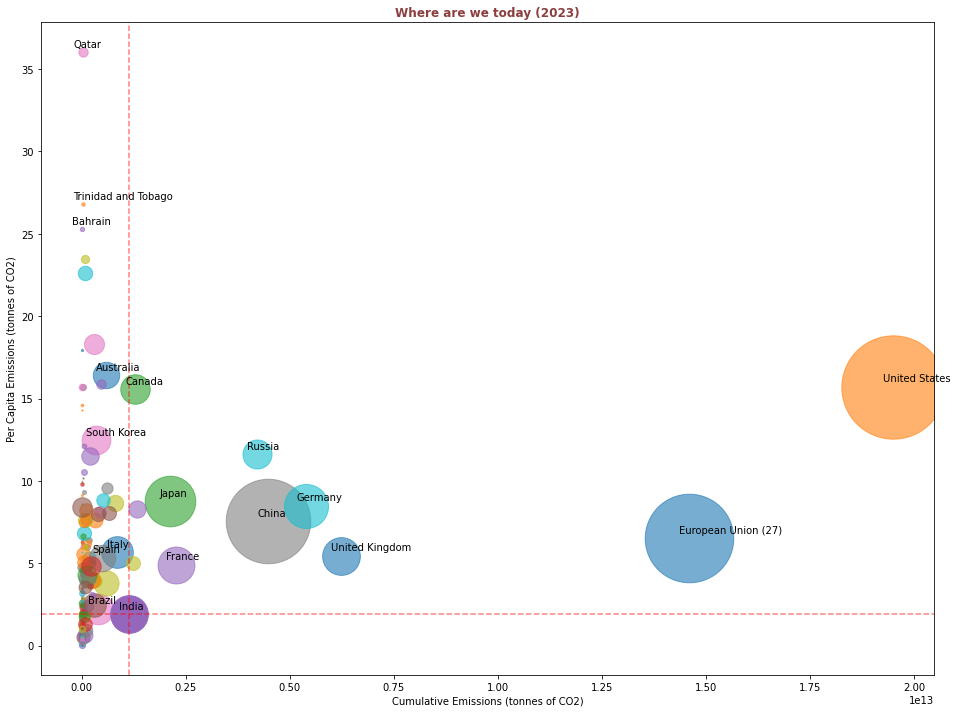

In [12]:
# Set up plot for the end part of the movie
fig, ax = plt.subplots(figsize=(16, 12))
fig.set_facecolor('white')

# Extract data for India
india = data[data['Country'] == 'India']
india_y = india['per_capita_emissions_2019'].iloc[0]
india_x = india['cumulative_emissions_2020'].iloc[0]

# Set up colors for each country
#colors = {'India': 'red', 'China': 'blue', 'United States': 'green', 'Russia': 'purple', 'Japan': 'orange'}

# Sort data by GDP in descending order and extract top 15 rows
top_15 = data.sort_values('GDP', ascending=False).head(15)

# Sort data by per capita emissions in descending order and extract top 3 rows
top_3_emittors = data.sort_values('per_capita_emissions_2019', ascending=False).head(3)

# Set up scaling factor for bubble size
scale_factor = 2000000000

# Plot bubbles for each country
for country in data['Country'].unique():
    subset = data[data['Country'] == country]
    y = subset['per_capita_emissions_2019']
    x = subset['cumulative_emissions_2020']
    size = subset['GDP'] / scale_factor
    alpha = 0.6
    if country == 'India':
        alpha = 1.0
    ax.scatter(x, y, s=size, alpha=alpha)

# Add horizontal and vertical lines for India
ax.axhline(y=india_y, linestyle='--', color='red', alpha=0.5)
ax.axvline(x=india_x, linestyle='--', color='red', alpha=0.5)


# Add text labels for top 20 countries by GDP
for i, row in top_15.iterrows():
    y = row['per_capita_emissions_2019']
    x = row['cumulative_emissions_2020']
    label = row['Country']
    ax.annotate(label, xy=(x, y), xytext=(-10, 5), textcoords='offset points', fontsize=10)

# Add text labels for top 3 countries by per capita emissions
for i, row in top_3_emittors.iterrows():
    y = row['per_capita_emissions_2019']
    x = row['cumulative_emissions_2020']
    label = row['Country']
    ax.annotate(label, xy=(x, y), xytext=(-10, 5), textcoords='offset points', fontsize=10)


# Set axis labels and title
ax.set_ylabel('Per Capita Emissions (tonnes of CO2)')
ax.set_xlabel('Cumulative Emissions (tonnes of CO2)')
ax.set_title('Where are we today (2023)', fontweight = "bold", color='#8C3F3F')

plt.savefig('CBAM_FINAL.png', dpi=300)
plt.show()

In [13]:
df_owid.fillna(0, inplace=True)

In [14]:
df_owid.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.121,0.0,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,1851,AFG,3769828.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.118,0.0,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,1852,AFG,3787706.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.116,0.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,1853,AFG,3806634.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.115,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,1854,AFG,3825655.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.114,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
df_owid.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_chang

In [16]:
df_owid_sel = df_owid[['country', 'year', 'iso_code', 'population', 'gdp','co2','co2_per_capita', 'co2_per_gdp','co2_including_luc', 'co2_including_luc_per_capita','co2_including_luc_per_gdp', 'cumulative_co2',
       'cumulative_co2_including_luc', 'energy_per_capita','energy_per_gdp', 'total_ghg','trade_co2', 'trade_co2_share']]

In [17]:
df_owid_sel.columns


Index(['country', 'year', 'iso_code', 'population', 'gdp', 'co2',
       'co2_per_capita', 'co2_per_gdp', 'co2_including_luc',
       'co2_including_luc_per_capita', 'co2_including_luc_per_gdp',
       'cumulative_co2', 'cumulative_co2_including_luc', 'energy_per_capita',
       'energy_per_gdp', 'total_ghg', 'trade_co2', 'trade_co2_share'],
      dtype='object')

In [18]:
df_owid_sel.head()


,country,year,iso_code,population,gdp,co2,co2_per_capita,co2_per_gdp,co2_including_luc,co2_including_luc_per_capita,co2_including_luc_per_gdp,cumulative_co2,cumulative_co2_including_luc,energy_per_capita,energy_per_gdp,total_ghg,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,1851,AFG,3769828.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,1852,AFG,3787706.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,1853,AFG,3806634.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,1854,AFG,3825655.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
df_owid_sel.country.unique()

array(['Afghanistan', 'Africa', 'Africa (GCP)', 'Aland Islands',
       'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola',
       'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Asia', 'Asia (GCP)',
       'Asia (excl. China and India)', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Central America (GCP)', 'Chad',
       'Chile', 'China', 'Christmas Island', 'Colombia', 'Comoros',
       'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmar

In [20]:
countries_to_keep = [
       'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chad',
       'Chile', 'China', 'Colombia', 'Comoros',
       'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'European Union (28)', 'Falkland Islands', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland', 'Grenada',
       'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Honduras',
       'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jersey',
       'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia',
       'Lebanon', 'Lesotho', 'Liberia', 'Libya',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macao',
       'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta',
       'Marshall Islands', 'Martinique', 'Mauritania', 'Mauritius', 'Mexico', 'Micronesia (country)',
       'Moldova', 'Mongolia', 'Montenegro',  'Morocco',
       'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal',
       'Netherlands', 'Netherlands Antilles', 'New Caledonia',
       'New Zealand', 'Nicaragua', 'Niger', 'Nigeria',  'North Korea',
       'Norway',  'Oceania', 'Oman',
       'Pakistan', 'Palau', 'Palestine', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Romania', 'Russia', 'Rwanda',  'Samoa','Saudi Arabia', 'Senegal', 'Serbia',
       'Seychelles', 'Sierra Leone', 'Singapore', 'Slovakia', 'Slovenia',
       'Solomon Islands', 'Somalia', 'South Africa', 'South Korea', 'South Sudan', 'Spain',
       'Sri Lanka',  'Sudan', 'Suriname', 'Sweden', 'Switzerland', 'Syria',
       'Taiwan', 'Tajikistan', 'Tanzania', 'Thailand', 'Timor', 'Togo',
       'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey',
       'Turkmenistan',  'Tuvalu', 'Uganda',
       'Ukraine', 'United Arab Emirates', 'United Kingdom',
       'United States', 'Uruguay', 'Uzbekistan',
       'Vanuatu', 'Venezuela', 'Vietnam',  'Yemen', 'Zambia', 'Zimbabwe']



In [21]:
df_owid_few = df_owid_sel[df_owid_sel.country.isin(countries_to_keep)]

need to install the following: 
!pip install imageio
!pip install pillow numpy
!pip install ffmpeg
!pip install pillow
!pip install scipy

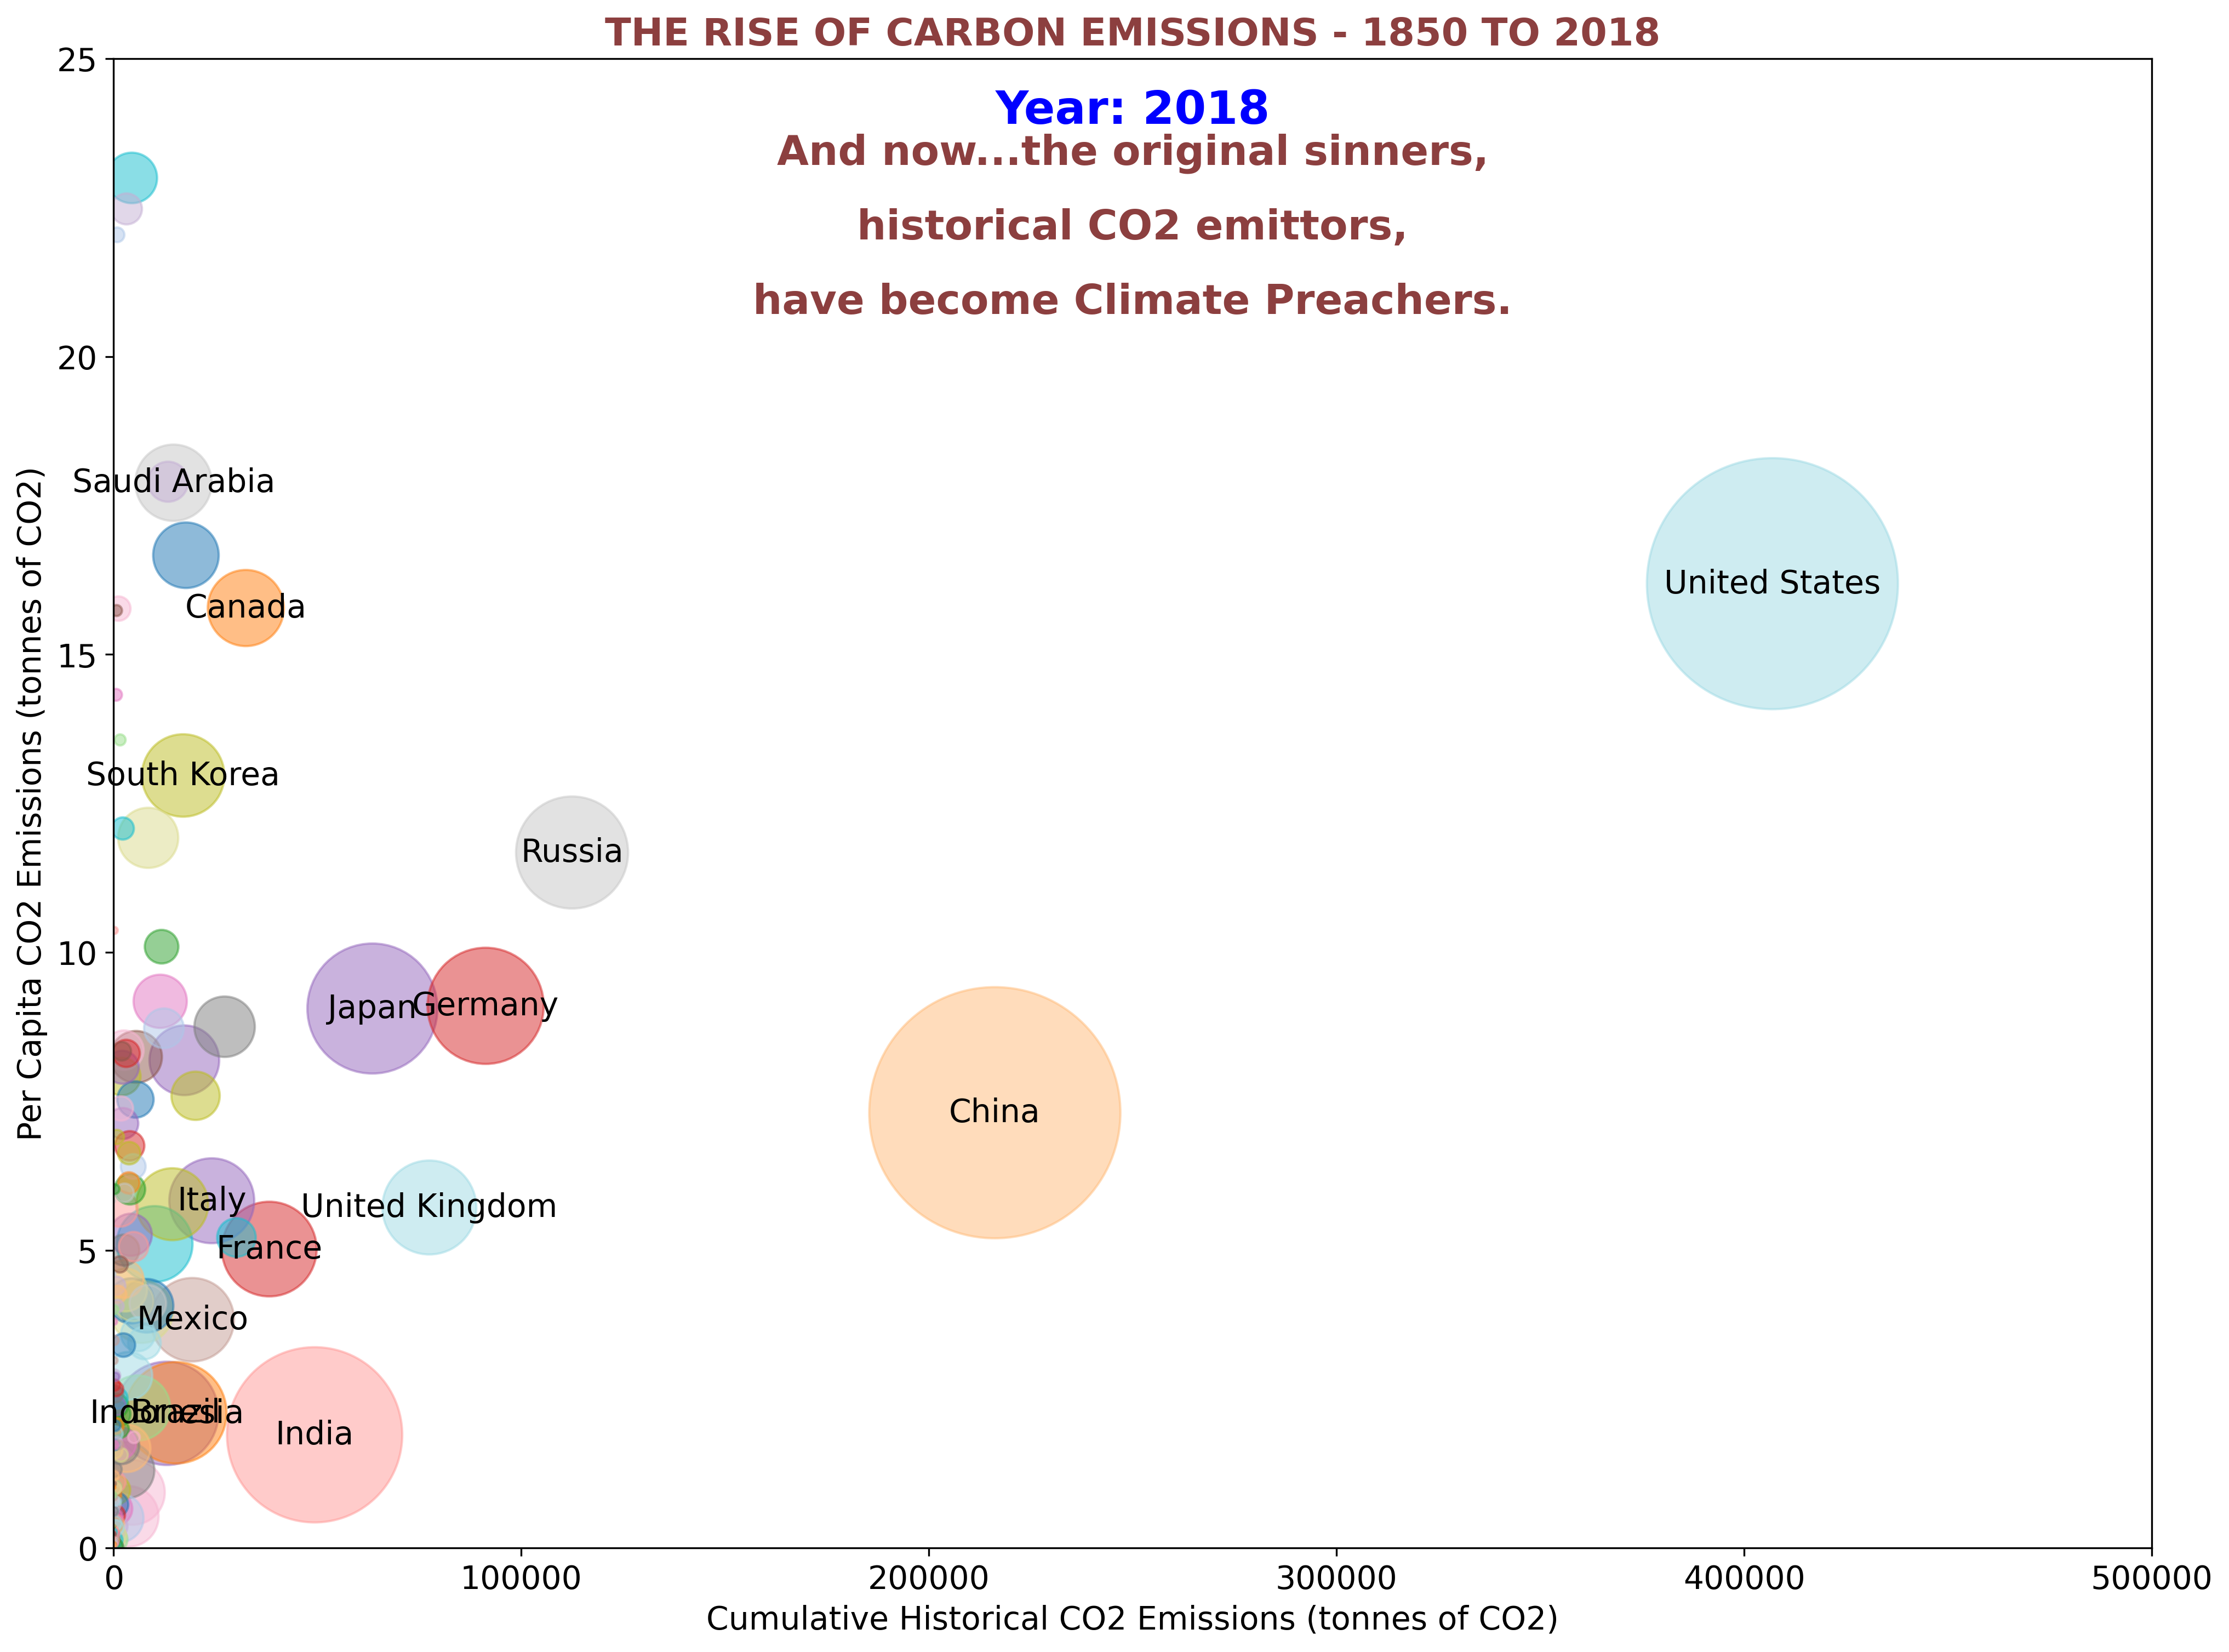

In [22]:
from matplotlib.animation import FuncAnimation

columns = ['country', 'year', 'co2_per_capita', 'cumulative_co2', 'gdp']
df = df_owid_few[columns]
years = [1850, 1900, 1950, 2000, 2018]

# Create a dictionary of country to color mappings
countries = df['country'].unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(countries)))
country_to_color = dict(zip(countries, colors))

# Set the font size for the plot labels and annotations
plt.rcParams.update({'font.size': 14})

# Set the figure size and dpi for the animation
fig = plt.figure(figsize=(16, 12), dpi=300)

# Define a function to create the bubble plot for a given year
def create_bubble_plot(year):
    # Select the data for the given year
    data = df[df['year'] == year]

    # Sort the data by GDP
    data = data.sort_values('gdp', ascending=False)

    # Get the top 15 countries by GDP
    top_countries = data.iloc[:15]['country'].tolist()

    # Set the size of the bubbles proportional to GDP
    sizes = data['gdp'] / 0.15e10

    # Set the color of the bubbles based on the country
    colors = [country_to_color[country] for country in data['country']]

    # Set the x-axis to cumulative CO2 emissions
    x = data['cumulative_co2']

    # Set the y-axis to CO2 emissions per capita
    y = data['co2_per_capita']

    # Clear the previous plot
    plt.cla()

    # Add the bubbles to the plot
    plt.scatter(x, y, s=sizes, c=colors, alpha=0.5)

    # Add labels to the bubbles for the top 10 countries by GDP
    for i, country in enumerate(data['country']):
        if country in top_countries:
            plt.annotate(country, (x.iloc[i], y.iloc[i]), ha='center', va='center')

    # Set the axis labels and title
    plt.xlabel('Cumulative Historical CO2 Emissions (tonnes of CO2)')
    plt.ylabel('Per Capita CO2 Emissions (tonnes of CO2)')
    plt.title(f'THE RISE OF CARBON EMISSIONS - 1850 TO 2018', fontweight = "bold", color='#8C3F3F')

    # Set the axis limits
    plt.xlim(0, 5e5)
    plt.ylim(0, 25)
    
    plt.annotate('Year: {}'.format(year), xy=(0.5, 0.98), xycoords='axes fraction', fontsize=20, fontweight = "bold", 
                 color = "Blue", ha='center', va='top')

    # Add text commentary
    if year <= 1870:
        plt.annotate("Many advanced economies of today had colonies,", xy=(0.5, 0.95), xycoords='axes fraction',  color='#8C3F3F', fontsize=18, ha='center', va='top', fontweight = "bold")
        plt.annotate("and were industrialising at a rapid pace", xy=(0.5, 0.90), xycoords='axes fraction', color='#8C3F3F', fontsize=18, ha='center', va='top', fontweight = "bold")
        plt.annotate("causing pollution and CO2 emissions", xy=(0.5, 0.85), xycoords='axes fraction',color='#8C3F3F', fontsize=18, ha='center', va='top', fontweight = "bold")
    if (year > 1870 and year <= 1908):
        plt.annotate("The emissions were a by-product,", xy=(0.5, 0.95), xycoords='axes fraction',color='#8C3F3F', fontsize=18, ha='center', va='top', fontweight = "bold")
        plt.annotate("of the human quest to industrialize,", xy=(0.5, 0.9), xycoords='axes fraction', color='#8C3F3F', fontsize=18, ha='center', va='top', fontweight = "bold")
        plt.annotate("and to advance the civilization towards prosperity.", xy=(0.5, 0.85), xycoords='axes fraction', color='#8C3F3F', fontsize=18, ha='center', va='top', fontweight = "bold")      
    if (year > 1909 and year <= 1924):
        plt.annotate("Then came the WWI,", xy=(0.5, 0.95), xycoords='axes fraction', color='#8C3F3F',fontsize=18, ha='center', va='top', fontweight = "bold")
        plt.annotate("leading to rapid rise in emissions,", xy=(0.5, 0.9), xycoords='axes fraction', color='#8C3F3F', fontsize=18, ha='center', va='top', fontweight = "bold")
        plt.annotate("and industrialization.", xy=(0.5, 0.85), xycoords='axes fraction', color='#8C3F3F', fontsize=18, ha='center', va='top', fontweight = "bold")    
    if (year > 1924 and year <= 1939):
        plt.annotate("The Great depression saw some slowdown,", xy=(0.5, 0.95), xycoords='axes fraction', color='#8C3F3F', fontsize=18, ha='center', va='top', fontweight = "bold") 
        plt.annotate("reminding us that what's perhaps bad for humans,", xy=(0.5, 0.9), xycoords='axes fraction',color='#8C3F3F',  fontsize=18, ha='center', va='top', fontweight = "bold")
        plt.annotate("might be good for the planet.", xy=(0.5, 0.85), xycoords='axes fraction', color='#8C3F3F', fontsize=18, ha='center', va='top', fontweight = "bold")
    if (year > 1939 and year <= 1949):
        plt.annotate("But as humans, we can't stop,", xy=(0.5, 0.95), xycoords='axes fraction', color='#8C3F3F', fontsize=18, ha='center', va='top', fontweight = "bold") 
        plt.annotate("and we promptly plunged into WWII,", xy=(0.5, 0.9), xycoords='axes fraction', color='#8C3F3F', fontsize=18, ha='center', va='top', fontweight = "bold")      
    if (year > 1949 and year <= 1960):
        plt.annotate("then came the reconstruction and development,", xy=(0.5, 0.95), xycoords='axes fraction', color='#8C3F3F', fontsize=18, ha='center', va='top', fontweight = "bold")  
        plt.annotate("more cars, more industries and greater prosperity,", xy=(0.5, 0.9), xycoords='axes fraction', color='#8C3F3F', fontsize=18, ha='center', va='top', fontweight = "bold")
        plt.annotate("to the CO2 emittors.", xy=(0.5, 0.85), xycoords='axes fraction', color='#8C3F3F', fontsize=18, ha='center', va='top', fontweight = "bold")
    if (year > 1960 and year <= 1980):
        plt.annotate("The Boomer generation came along", xy=(0.5, 0.95), xycoords='axes fraction', color='#8C3F3F', fontsize=18, ha='center', va='top', fontweight = "bold") 
        plt.annotate("with more CO2 and prosperity like never before,", xy=(0.5, 0.9), xycoords='axes fraction', color='#8C3F3F', fontsize=18, ha='center', va='top', fontweight = "bold")
        plt.annotate("but things changed hereafter.", xy=(0.5, 0.85), xycoords='axes fraction',color='#8C3F3F',  fontsize=18, ha='center', va='top', fontweight = "bold")
    if (year > 1980 and year <= 2000):
        plt.annotate("CHINA came on the stage", xy=(0.5, 0.95), xycoords='axes fraction', color='#8C3F3F', fontsize=18, ha='center', va='top', fontweight = "bold")
        plt.annotate("followed by other countries that started catching up,", xy=(0.5, 0.9), xycoords='axes fraction', color='#8C3F3F', fontsize=18, ha='center', va='top', fontweight = "bold")
        plt.annotate("like India.", xy=(0.5, 0.85), xycoords='axes fraction',color='#8C3F3F', fontsize=18, ha='center', va='top', fontweight = "bold")
    if (year > 2000 and year <= 2018):
        plt.annotate("And now...the original sinners,", xy=(0.5, 0.95), xycoords='axes fraction', color='#8C3F3F', fontsize=18, ha='center', va='top', fontweight = "bold")
        plt.annotate("historical CO2 emittors,", xy=(0.5, 0.9), xycoords='axes fraction', color='#8C3F3F', fontsize=18, ha='center', va='top', fontweight = "bold")
        plt.annotate("have become Climate Preachers.", xy=(0.5, 0.85), xycoords='axes fraction', color='#8C3F3F', fontsize=18, ha='center', va='top', fontweight = "bold")
        
# Create the animation
animation = FuncAnimation(fig, create_bubble_plot, frames=years, interval=100, repeat=False)

# Save the animation as a GIF
animation.save('CBAM_animation_annotated_final.gif', writer='imagemagick', fps=3)

# Show the animation
plt.show()
